In [1]:
import clmm
import numpy as np
import matplotlib.pyplot as plt
from clmm import Cosmology
import h5py

In [2]:
true_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_shear_catalogs.hdf5'

# with h5py.File(true_shear, 'r') as f:
#     # List all groups/datasets
#     print("Keys:", list(f.keys()))
    
#     # Access a dataset
#     true_g1 = np.array(f['index']['g1'])
#     true_distance = np.array(f['index']['distance_arcmin'])



# # Plotting
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(true_distance, true_g1, s=1, color='blue', alpha=0.5)
# plt.title('True Shear 20deg2')
# plt.xlabel('Distance (arcmin)')
# plt.ylabel('Shear g1')
# plt.subplot(1, 2, 2)
# plt.tight_layout()
# plt.show()
# # Plotting the histograms
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(true_g1, bins=50, color='blue', alpha=0.7)
# plt.title('Histogram of True Shear g1 20deg2')
# plt.xlabel('Shear g1')
# plt.ylabel('Frequency')
# plt.subplot(1, 2, 2)

# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [3]:
# print("True shear g1 mean:", np.mean(true_g1))
# print("True shear g1 std:", np.std(true_g1))

# print("True shear g1 min:", np.min(true_g1))
# print("True shear g1 max:", np.max(true_g1))

# print("Number of shear higher than 0.1", np.sum(true_g1 > 0.1))
# print("Number of shear lower than -0.1", np.sum(true_g1 < -0.1))

# print("Total number of sorces", len(true_g1))
# print("Percentage of false g1 higher than 0.1", np.sum(true_g1 > 0.1)/len(true_g1))

{np.str_('bin_z_0'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5d47a8980>, np.str_('bin_rich_0'): <sacc.tracers.clusters.BinRichnessTracer object at 0x7fe5d47a86e0>, np.str_('bin_rich_1'): <sacc.tracers.clusters.BinRichnessTracer object at 0x7fe5dce87ed0>, np.str_('bin_rich_2'): <sacc.tracers.clusters.BinRichnessTracer object at 0x7fe5dce87b10>, np.str_('bin_rich_3'): <sacc.tracers.clusters.BinRichnessTracer object at 0x7fe5d47756e0>, np.str_('bin_z_1'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5dce87c50>, np.str_('bin_z_2'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5dce87750>, np.str_('bin_z_3'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5d4774e90>, np.str_('bin_z_4'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5d47755b0>, np.str_('bin_z_5'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5d4563e30>, np.str_('bin_z_6'): <sacc.tracers.clusters.BinZTracer object at 0x7fe5dcef38a0>, np.str_('radius_0'): <sacc.tracers.clusters.BinRadiusTracer object a

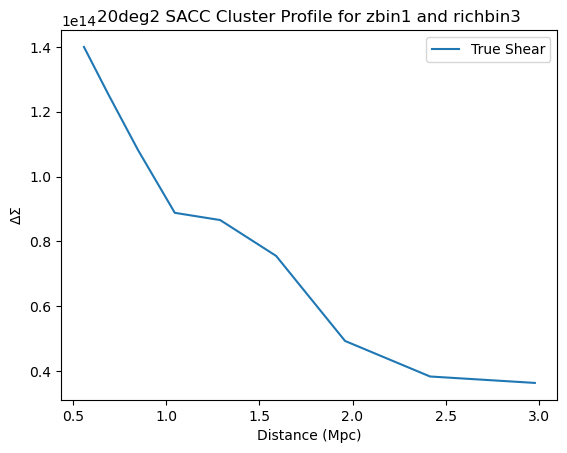

In [4]:
import sacc
sacc_file_20_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc'

t1 = sacc.Sacc.load_fits(sacc_file_20_true)
print(t1.tracers)
#print(t1.data)
data2 = []
radius2 = []
for i in range(0,9):
    trac = ('cosmodc2-20deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t1.get_data_points(sacc.data_types.standard_types.cluster_delta_sigma, trac)[0].value)
    radius = (t1.tracers[f'radius_{i}'].upper + t1.tracers[f'radius_{i}'].lower)/2
    radius2.append(radius)
plt.plot(radius2, data2, label='True Shear')




plt.title('20deg2 SACC Cluster Profile for zbin1 and richbin3')
plt.xlabel('Distance (Mpc)')
plt.ylabel('$\Delta \Sigma $')

plt.legend()
print(f'z_bin is [{t1.get_tracer('bin_z_1').lower}, {t1.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10*(t1.get_tracer('bin_rich_1').lower)}, {10*(t1.get_tracer('bin_rich_1').upper)}] \n')
print(f'z_bin is [{t1.get_tracer('bin_z_1').lower}, {t1.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10*(t1.get_tracer('bin_rich_3').lower)}, {10*(t1.get_tracer('bin_rich_3').upper)}] \n')
print(f'z_bin is [{t1.get_tracer('bin_z_1').lower}, {t1.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10**(t1.get_tracer('bin_rich_3').lower)}, {10**(t1.get_tracer('bin_rich_3').upper)}] \n')

### Constantin Data

<Figure size 700x400 with 0 Axes>

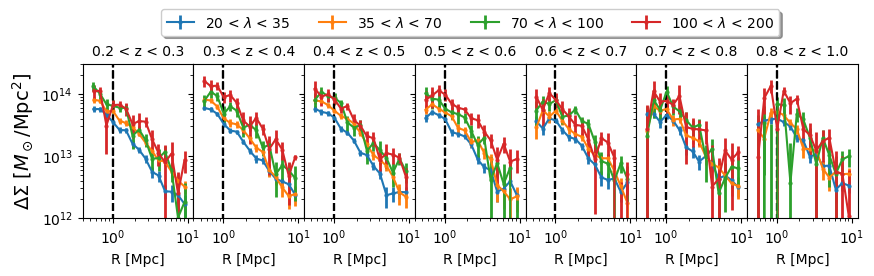

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('/sps/lsst/users/ebarroso/CLCosmo_Sim')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '/sps/lsst/users/ebarroso/CLCosmo_Sim_database/data/'
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,len(Z_bin), figsize = (10,2))
fig.subplots_adjust(wspace=0, hspace=0)
for i, z_bin in enumerate(Z_bin):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(1e12, 3e14)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel('R [Mpc]', fontsize = 10)
            axs[i].set_title(label_z, fontsize = 10)
            axs[0].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, 1.4),
          ncol=4, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
#plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=100)

## Comparison calibrated to constantints data

('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_0')
[DataPoint(data_type='cluster_delta_sigma', tracers=('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_0'), value=57237790933615.695, )]
('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_1')
[DataPoint(data_type='cluster_delta_sigma', tracers=('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_1'), value=54312553076288.03, )]
('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_2')
[DataPoint(data_type='cluster_delta_sigma', tracers=('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_2'), value=43063724832017.19, )]
('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_3')
[DataPoint(data_type='cluster_delta_sigma', tracers=('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_3'), value=31210550182570.465, )]
('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_4')
[DataPoint(data_type='cluster_delta_sigma', tracers=('cosmodc2-20deg2-CL', 'bin_rich_0', 'bin_z_1', 'radius_4'), value=27007947210650.

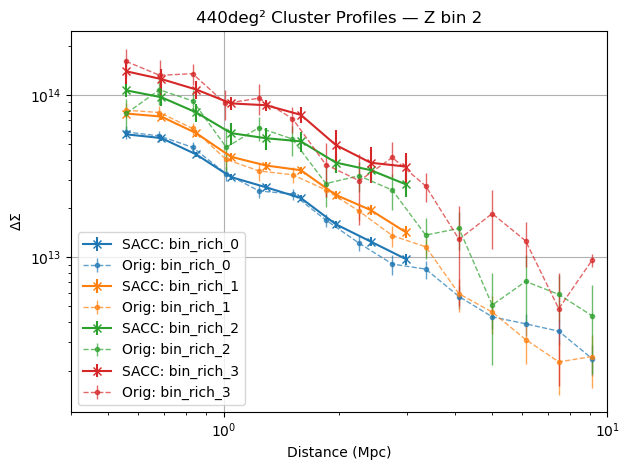

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Color map to ensure consistent color across both plots
cmap = plt.get_cmap('tab10')  # Or use the same cmap as your SACC plots

z_bin_index = 1  # Third z-bin
z_bin = Z_bin[z_bin_index]
zbin = 'bin_z_1'
# Begin loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    color = cmap(rich_bin_index)  # Get consistent color per bin

    data_true = []
    data_true_error = []

    radius_vals = []

    for i in range(9):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2-20deg2-CL', rich_bin, zbin, radius_key)
        print(trac)
        radius = (t1.tracers[radius_key].upper + t1.tracers[radius_key].lower) / 2
        radius_vals.append(radius)
        print(t1.get_data_points(sacc.data_types.standard_types.cluster_delta_sigma, trac))
        data_true.append(t1.get_data_points(sacc.data_types.standard_types.cluster_delta_sigma, trac)[0].value)
        false_index = t1.indices(sacc.data_types.standard_types.cluster_delta_sigma, trac)
        data_true_error.append(np.sqrt(t1.covariance.covmat[false_index][:, false_index][0, 0]))

    # Plot SACC profile
    plt.errorbar(
        radius_vals, data_true, yerr=data_true_error,
        label=f'SACC: {rich_bin}', marker='x', color=color, linestyle='-'
    )

    # --- Overlay original profile (dashed line) from Z_bin[2] ---
    m_bin = Obs_bin[rich_bin_index]
    mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
    mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
    index_cut = np.where(mask_z & mask_m)[0]

    if len(index_cut) > 0:
        f_cut = profiles[index_cut]
        cov = np.array(covariances['cov_t'][index_cut])
        err = cov.T.diagonal()**0.5
        plt.errorbar(
            f_cut['radius'][0], f_cut['gt'][0], err[0],
            label=f'Orig: bin_rich_{rich_bin_index}', fmt='--', color=color,
            elinewidth=1, linewidth=1, markersize=3, marker='o', alpha=0.7
        )
plt.xlabel('Distance (Mpc)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² Cluster Profiles — Z bin {z_bin_index + 1}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
lsst_frace_output = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/'
new_output = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-2026/'


